**Contexte**

Depuis le début de la saison 2024-2025 de football, le célèbre tournoi appelé Ligue des Champions, ou *Champions League* en anglais, a vu son format modifié.

En effet, avant ce changement, 32 équipes étaient qualifiées pour disputer une phase de groupes. Huit groupes de quatre équipes s'affrontaient alors en matchs aller-retour, chaque équipe jouant trois matchs à domicile et trois à l'extérieur, mais contre seulement trois adversaires différents.

Un point important à noter est que, avant le tirage au sort, les équipes étaient réparties dans quatre chapeaux différents en fonction de leur niveau. Chaque groupe était alors composé d'une équipe issue de chaque chapeau, ce qui évitait que les meilleures équipes ne se rencontrent directement avant la phase à élimination directe.

Dans le but d'augmenter l'attractivité de la compétition pour les supporters et annonceurs, l'UEFA a décidé de repenser ce format et de transformer la phase de groupes en un championnat composé de 36 équipes. Désormais, chaque équipe jouera huit matchs (contre six auparavant), et ce, contre huit adversaires différents, avec quatre matchs à domicile et quatre à l'extérieur. Une victoire rapporte 3 points, un match nul 1 point, et une défaite 0 point. À l'issue du championnat, les huit meilleures équipes sont directement qualifiées pour les huitièmes de finale à élimination directe, tandis que les équipes classées de la 9e à la 24e place (soit 16 équipes) s'affronteront lors d'une confrontation aller-retour pour accéder aux huitièmes de finale. Cette phase supplémentaire peut être appelée phase de barrage ou *play-off*.

En ce qui concerne le tirage au sort, les équipes sont réparties comme auparavant en quatre chapeaux de neuf équipes, classées selon leur coefficient UEFA. Les meilleures équipes se retrouvent donc dans le chapeau 1, et les moins bien classées dans le chapeau 4. Cependant, contrairement à l'ancien format, chaque équipe affrontera désormais deux équipes de chaque chapeau. Cela permet une plus grande équité entre les équipes et garantit des affiches de prestige dès la phase de championnat, ce qui n'était pas possible dans l'ancien format avant la phase à élimination directe.

**Problématique**

Avec ce nouveau format de compétition, une question se pose : combien de points faut-il pour se qualifier directement en huitièmes de finale, et combien pour accéder au moins à la phase de barrage ?

**Comment répondre à cette question ?**

Pour y répondre, on peut utiliser une simulation de Monte Carlo. Cette méthode statistique repose sur des échantillons aléatoires pour estimer des résultats numériques dans des situations complexes ou incertaines. Elle fonctionne en générant de nombreuses simulations aléatoires pour explorer différents scénarios possibles et ainsi évaluer les probabilités ou estimer des valeurs moyennes.

On utilise cette méthode lorsque la résolution analytique d'un problème est trop complexe (par exemple, le calcul des probabilités dans des systèmes financiers, physiques, ou de jeux). En répétant des milliers, voire des millions de fois une simulation avec des paramètres aléatoires, on obtient une approximation fiable des résultats attendus.

**Réalisation de la simulation**

Pour réaliser cette simulation, nous nous baserons sur un historique riche en résultats de matchs de football. En effet, à partir du site internet *Transfermarkt*, qui regroupe de nombreuses données footballistiques, nous récupérerons les résultats des matchs de football joués entre 1990 et 2023 dans les cinq grands championnats européens : l’Allemagne, l’Angleterre, l’Espagne, la France, et l’Italie. Cela représente au total plus de 45 000 résultats. Grâce à cet historique, nous pourrons déterminer la fréquence d’apparition des scores tels que "1-0", "2-2", "1-2", etc.

Une fois ces statistiques collectées, nous générerons un très grand nombre de championnats. Autrement dit, nous effectuerons un tirage au sort de huit confrontations pour chacune des 36 équipes, dont quatre à domicile et quatre à l'extérieur. Nous veillerons évidemment à ce qu'aucune équipe ne rencontre la même équipe deux fois dans le même championnat et qu’elle joue bien huit matchs au total. Un championnat complet comporte ainsi 144 confrontations différentes.

Pour chaque rencontre, nous tirerons également au sort un résultat en respectant les probabilités associées à chaque score de notre historique.

Une fois la simulation réalisée, il ne nous restera plus qu’à analyser les données pour savoir si Brest (qui a déjà 7 points après seulement trois matchs) pourra se qualifier en huitièmes de finale ou accéder au moins à la phase de barrage !

# <span style="color:green"> Bibliothèques </span>

In [1]:
import fonctions_file as f
import requests
from bs4 import BeautifulSoup
import time
from tqdm import tqdm
import pandas as pd
import numpy as np
import itertools
import pandas as pd
from pandasql import sqldf
import random


# <span style="color:green"> Génération de 10000 calendriers de matchs </span>

In [ ]:
#On génère 10000 calendriers de matchs composé chacun de 144 matchs
df_multi_calendar_champions_league = f.generate_multi_competition_calendar(10000)
df_multi_calendar_champions_league.to_csv('multi_calendar_champions_league.csv', index=False)

#Etant donné que la création de calendriers est longue, nous avons lancé ce processus une fois et avons enregistré les résultats dans un fichier csv multi_calendar_champions_league.csv

  0%|                                                                               | 2/9999 [00:02<3:17:04,  1.18s/it]

In [2]:
df_multi_calendar_champions_league = pd.read_csv("./multi_calendar_champions_league.csv")

#Lors de certaines saisons, une erreur s'est glissée : une équipe peut se rencontrer elle-même. Nous ne prennons donc pas en compte l'ensemble des matchs joués lors de celes-ci. Cela représente 1603 saisons erronées.
#Le nombre de saisons simulées passe donc à 8397.
q="""
WITH season_with_error AS (
        SELECT DISTINCT id_season
        FROM df_multi_calendar_champions_league
        WHERE home_team = away_team
    )
    
SELECT
    d.id_season,
    id_match,
    match,
    home_team,
    away_team
FROM df_multi_calendar_champions_league d
LEFT JOIN season_with_error e ON d.id_season = e.id_season
WHERE e.id_season IS NULL
"""
df_multi_calendar_champions_league_clean = sqldf(q)
df_multi_calendar_champions_league_clean

,id_season,id_match,match,home_team,away_team
0,1,1,team_10:team_18,team_10,team_18
1,1,2,team_10:team_28,team_10,team_28
2,1,3,team_10:team_31,team_10,team_31
3,1,4,team_10:team_5,team_10,team_5
4,1,5,team_11:team_1,team_11,team_1
...,...,...,...,...,...
1209019,10000,140,team_8:team_32,team_8,team_32
1209020,10000,141,team_9:team_14,team_9,team_14
1209021,10000,142,team_9:team_30,team_9,team_30
1209022,10000,143,team_9:team_35,team_9,team_35


In [3]:
#On s'assure qu'il y a bien 144 affiches différentes lors de chaque saison*

q="""
SELECT id_season,
    COUNT(DISTINCT match)
FROM df_multi_calendar_champions_league_clean
GROUP BY id_season
HAVING COUNT(DISTINCT match) <> 144

"""
sqldf(q)


#Le requête ne nous renvoie aucune donnée. Nous sommes donc maintenant sûr que toutes les données sont propres, nous allons pouvoir les exploiter.

,id_season,COUNT(DISTINCT match)


# <span style="color:green">Probabilités associées à un résultat de match</span>

A présent, nous voulons simuler pour chaque match un résultat. Pour cela, nous allons récupérer l'historique des résultats des matchs de football qui se sont déroulés dans les 5 grands championnasts européens (Allemagne, Angleterre, Espagne, France & Italie) entre les années 1990 et 2024. Ainsi, nous pourrons estimer à quelle fréquence un résultat (par exemple :'3-0', ''2-2, ou 1-2') se produit.

A partir d'un csv de données que nous avons directement scrappé sur le site internet tranfertmarkt, voici les propabilités associées à chaque résultat d'un match de football.

In [ ]:
start_time = time.time()

list_url = f.get_list_url()
list_scores = []
i = 0
#Pour chaque url on va récupérer les scores
for url in tqdm(list_url) :
    f.get_scores_for_url(list_scores, url)
    i += 1
    if i%500 ==0 :
        pd.DataFrame(list_scores, columns=["score"]).to_csv('football_scores.csv', index=False)
        print(f'{i} url saved')
        
print('execution time :', time.time() - start_time)

#Etant donné que la récupération des historiques est longue, nous avons lancé ce processus une fois et avons enregistré les résultats dans un fichier csv football_scores.csv

  0%|                                                                                 | 4/5780 [00:02<56:50,  1.69it/s]

In [5]:
df_football_scores = pd.read_csv("./football_scores.csv")

q="""
SELECT 
    score, 
    COUNT(*) AS count,
    CAST(COUNT(*) / 45783.0 AS FLOAT) AS probability
FROM df_football_scores
GROUP BY score
ORDER BY COUNT(*) DESC
"""
df_score_probabilities = sqldf(q)

#On récupère les évenements et les probablités associées dans des listes afin de configurer la fonction random selon ces probabilités
scores = df_score_probabilities['score'].values.tolist()
probabilities = df_score_probabilities['probability'].values.tolist()

df_score_probabilities

,score,count,probability
0,1:1,5792,0.126510
1,1:0,4866,0.106284
2,2:1,4016,0.087718
3,0:0,3903,0.085250
4,2:0,3697,0.080750
...,...,...,...
61,7:4,1,0.000022
62,1:9,1,0.000022
63,1:8,1,0.000022
64,10:2,1,0.000022


Nous allons pour chaque match de notre table `df_data_simulation_champions_league_clean` tirer aléatoirement un score, en suivant bien entendu la fréquence d'apparition d'un résultat.

In [6]:
#Nombre de résultats à simuler
nbr_iter = df_multi_calendar_champions_league_clean['match'].shape[0]



#simulation du résultat de chaque match
simulation_scores=[]
for i in tqdm(range(nbr_iter)):
    simulation_scores.append(random.choices(scores, probabilities))

#On convertit la liste en dataframe pour pouvoir joindre ces résultats avec la table df_data_simulation_champions_league_clean
df_simulation_scores = pd.DataFrame(simulation_scores, columns=['result'])

#On concatène les 2 table
df_simulation_champions_league = pd.concat([df_multi_calendar_champions_league_clean,df_simulation_scores], axis=1, ignore_index=False)

#On reformate les données 
q="""
WITH div_result_home_away AS (
        SELECT
            id_season,
            id_match,
            home_team,
            away_team,
            substr(result, 1, instr(result, ':') - 1) AS score_home_team,
            substr(result, instr(result, ':') + 1) AS score_away_team
        
        FROM df_simulation_champions_league
        ),

    points_earned_table AS (
        SELECT 
            *,
            CASE 
                WHEN score_home_team > score_away_team THEN 3
                WHEN score_home_team = score_away_team THEN 1
                WHEN score_home_team < score_away_team THEN 0
            END AS point_home_team,

            CASE 
                WHEN score_home_team < score_away_team THEN 3
                WHEN score_home_team = score_away_team THEN 1
                WHEN score_home_team > score_away_team THEN 0
            END AS point_away_team

        FROM div_result_home_away
        ),
    
    teams_table AS (
        SELECT DISTINCT home_team AS team
        FROM points_earned_table
        GROUP BY home_team
        ),
    
    home_teams_table AS (
        SELECT
            id_season,
            id_match,
            t.team,
            'home' AS home_away,
            away_team AS opponent,
            score_home_team AS team_score,
            score_away_team AS opponent_score,
            point_home_team AS points_earned
        FROM teams_table t
        FULL OUTER JOIN points_earned_table p ON t.team = p.home_team
        ),
        
    away_teams_table AS (
        SELECT
            id_season,
            id_match,
            t.team,
            'away' AS home_away,
            home_team AS opponent,
            score_away_team AS team_score,
            score_home_team AS opponent_score,
            point_away_team AS points_earned
        FROM teams_table t
        FULL OUTER JOIN points_earned_table p ON t.team = p.away_team
        )
        
SELECT *
FROM home_teams_table
UNION
SELECT *
FROM away_teams_table
"""
df_data_simulation_champions_league = sqldf(q)

#On enregistre ces données dans un csv
df_data_simulation_champions_league.to_csv('data_simulation_champions_league.csv', index=False)

100%|████████████████████████████████████████████████████████████████████| 1209024/1209024 [00:07<00:00, 171066.13it/s]


# <span style="color:green">Data analyse</span>

Maintenant que nous avons des données propres et un résultat tiré aléatoirement suivant une loi de probabilité basée sur un large historique de match de football, nous allons pouvoir analyser ces données.

In [7]:
df_data_champions_league = pd.read_csv("./data_simulation_champions_league.csv")
df_data_champions_league.head()

,id_season,id_match,team,home_away,opponent,team_score,opponent_score,points_earned
0,1,1,team_10,home,team_18,2,1,3
1,1,1,team_18,away,team_10,1,2,0
2,1,2,team_10,home,team_28,2,2,1
3,1,2,team_28,away,team_10,2,2,1
4,1,3,team_10,home,team_31,3,1,3


On génère le classement des équipes en fonction de leurs résultats 

In [8]:
q="""

WITH ranking_table AS (
        SELECT
            id_season,
            team,
            COUNT(CASE WHEN points_earned = 3 THEN 1 END) AS nbr_win,
            COUNT(CASE WHEN points_earned = 1 THEN 1 END) AS nbr_draw,
            COUNT(CASE WHEN points_earned = 0 THEN 1 END) AS nbr_lose,
            SUM(points_earned) AS total_points,
            SUM(team_score) AS total_goal_scored,
            SUM(opponent_score) AS total_goal_conceded,
            SUM(team_score)-SUM(opponent_score) AS goal_difference

        FROM df_data_champions_league
        GROUP BY id_season, team
    )


SELECT 
    *,
    ROW_NUMBER() OVER(
        PARTITION BY id_season 
        ORDER BY total_points DESC, goal_difference DESC, nbr_win DESC, nbr_draw DESC, total_goal_scored) AS team_ranking
FROM ranking_table
"""
df_ranking = sqldf(q)
df_ranking.to_csv('simulation_champions_league_rankings.csv', index=False)

In [9]:
#Exemple du classement sur la saison numéro 2024
df_ranking = pd.read_csv("./simulation_champions_league_rankings.csv")
df_ranking[df_ranking['id_season']==2024]

,id_season,team,nbr_win,nbr_draw,nbr_lose,total_points,total_goal_scored,total_goal_conceded,goal_difference,team_ranking
61272,2024,team_20,6,1,1,19,15,7,8,1
61273,2024,team_33,5,1,2,16,17,10,7,2
61274,2024,team_18,4,3,1,15,16,10,6,3
61275,2024,team_23,4,3,1,15,12,8,4,4
61276,2024,team_31,4,2,2,14,11,6,5,5
61277,2024,team_11,4,2,2,14,13,8,5,6
61278,2024,team_24,4,2,2,14,9,5,4,7
61279,2024,team_14,4,2,2,14,14,12,2,8
61280,2024,team_35,4,1,3,13,16,11,5,9
61281,2024,team_6,4,1,3,13,11,8,3,10


In [10]:
q="""

WITH count_qualification AS (
        SELECT total_points AS points_scored,
            COUNT(*) AS total_count_points_scored,
            COUNT(CASE WHEN team_ranking<9 THEN 1 END) AS nbr_directqualified,
            COUNT(CASE WHEN team_ranking BETWEEN 9 AND 24 THEN 1 END) AS nbr_play_off_qualified,
            COUNT(CASE WHEN team_ranking >24 THEN 1 END) AS nbr_not_qualified
        FROM df_ranking
        GROUP BY total_points
        ORDER BY total_points DESC
        )
        
SELECT
    points_scored,
    ROUND(CAST(CASE 
            WHEN total_count_points_scored = 0 THEN 0
            ELSE nbr_directqualified * 100.0 / total_count_points_scored 
         END AS FLOAT), 2) AS direct_qualification_rate,

    ROUND(CAST(CASE 
            WHEN total_count_points_scored = 0 THEN 0
            ELSE nbr_play_off_qualified * 100.0 / total_count_points_scored 
         END AS FLOAT), 2) AS play_off_qualification_rate,

    ROUND(CAST(CASE 
            WHEN total_count_points_scored = 0 THEN 0
            ELSE nbr_not_qualified * 100.0 / total_count_points_scored 
         END AS FLOAT), 2) AS no_qualification_rate
FROM count_qualification
"""
sqldf(q)

,points_scored,direct_qualification_rate,play_off_qualification_rate,no_qualification_rate
0,24,100.00,0.00,0.00
1,22,100.00,0.00,0.00
2,21,100.00,0.00,0.00
3,20,100.00,0.00,0.00
4,19,100.00,0.00,0.00
5,18,100.00,0.00,0.00
6,17,100.00,0.00,0.00
7,16,99.89,0.11,0.00
8,15,96.64,3.36,0.00
9,14,67.65,32.35,0.00


Le tableau ci-dessus présente les probabilités pour une équipe de se qualifier directement pour les huitièmes de finale, pour les barrages (play-offs) ou d'être éliminée, en fonction du nombre de points marqués.

On observe qu’une équipe avec `17 points` ou plus est assurée de se qualifier directement pour les huitièmes de finale. À `16 et 15 points`, la probabilité de qualification directe est quasiment sûre respectivement 99,9% et 96,6 %, mais elle chute rapidement à 67,7 % pour les équipes marquant 14 points.

À partir de 15, 14, ou 13 points, certaines équipes ne se qualifient plus directement mais accèdent aux barrages, avec respectivement 3,4 %, 32,3 % et 85,4 % de probabilités de se retrouver en play-offs. Cela peut être frustrant pour les équipes ayant réalisé un excellent parcours.

Pour les équipes marquant entre 12 et 11 points, la qualification pour les barrages est garantie, en revanche elles ne peuvent quasiment pas espérer accéder aux huitièmes de finale directement, mais ne risquent pas non plus l'élimination.

A partir du moment où les équipes ne marquent que 10 points, 11 % des équipes sont éliminées. Cette probabilité augmente fortement avec 68 % d’élimination pour seulement 9 points, et 98,4 % pour 8 points. Il devient alors très improbable de se qualifier avec 8 points, et en dessous de ce score, la qualification est rarissime voire impossible.

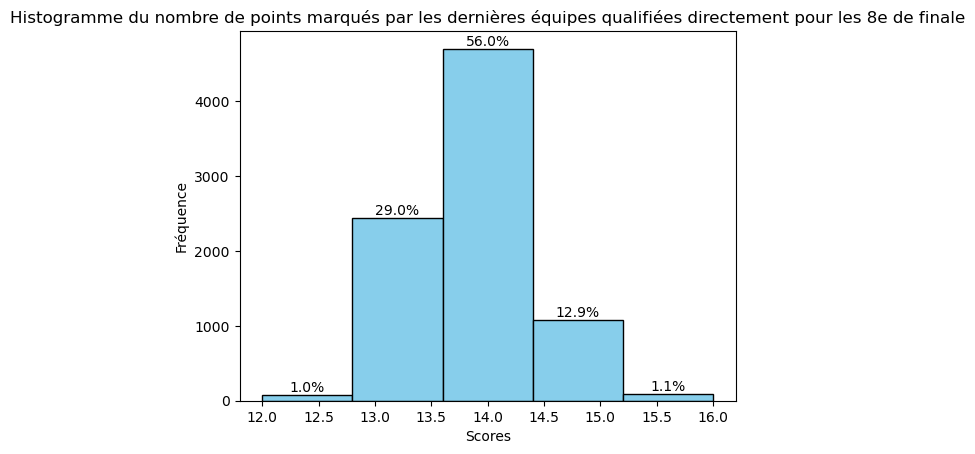

In [13]:
#Distibution du nombre de points nécessaires pour se qualifier directement en 8e de final de la compétition

import matplotlib.pyplot as plt
import numpy as np

# Exemple de données (par exemple, des scores)
score_last_direct_qualifying = df_ranking[df_ranking['team_ranking'] == 8]['total_points'].values.tolist()
nbr_bins = df_ranking[df_ranking['team_ranking'] == 8]['total_points'].nunique()

# Création de l'histogramme
counts, bins, patches = plt.hist(score_last_direct_qualifying, bins=nbr_bins, color='skyblue', edgecolor='black')

# Calcul du pourcentage pour chaque barre et ajout des annotations
total_count = len(score_last_direct_qualifying)
for count, patch in zip(counts, patches):
    # Calcul du pourcentage pour chaque barre
    percentage = (count / total_count) * 100
    # Positionnement du texte
    plt.text(patch.get_x() + patch.get_width() / 2, count, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10, color='black')

# Titre et labels
plt.title("Histogramme du nombre de points marqués par les dernières équipes qualifiées directement pour les 8e de finale")
plt.xlabel("Scores")
plt.ylabel("Fréquence")

# Affichage
plt.show()

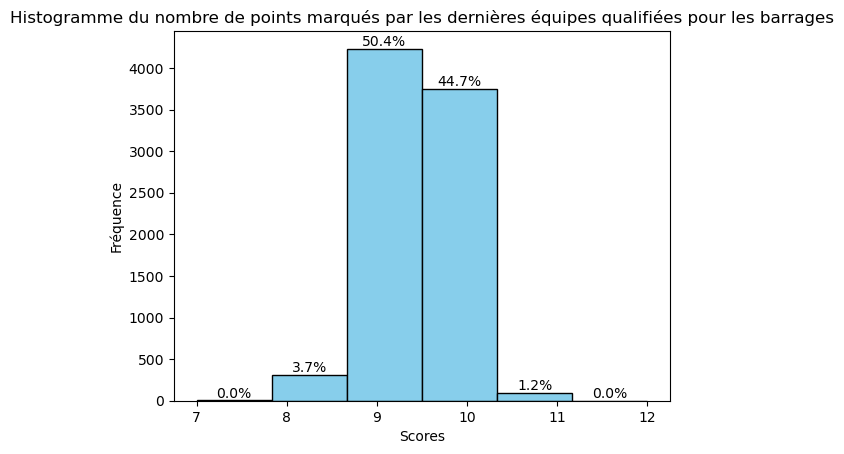

In [14]:
#Distibution du nombre de points nécessaires pour se qualifier directement en 16e de final de la compétition

import matplotlib.pyplot as plt
import numpy as np

# Exemple de données (par exemple, des scores)
score_last_qualifying = df_ranking[df_ranking['team_ranking'] == 24]['total_points'].values.tolist()
nbr_bins = df_ranking[df_ranking['team_ranking'] == 24]['total_points'].nunique()

# Création de l'histogramme
counts, bins, patches = plt.hist(score_last_qualifying, bins=nbr_bins, color='skyblue', edgecolor='black')

# Calcul du pourcentage pour chaque barre et ajout des annotations
total_count = len(score_last_qualifying)
for count, patch in zip(counts, patches):
    # Calcul du pourcentage pour chaque barre
    percentage = (count / total_count) * 100
    # Positionnement du texte
    plt.text(patch.get_x() + patch.get_width() / 2, count, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontsize=10, color='black')

# Titre et labels
plt.title("Histogramme du nombre de points marqués par les dernières équipes qualifiées pour les barrages")
plt.xlabel("Scores")
plt.ylabel("Fréquence")

# Affichage
plt.show()